# Clean And Analyze Employee Exit Surveys

In this project we have two datasets:
Department of Education, Training and Employment (DETE)
Technical and Further Education (TAFE) institute

in Queensland, Australia. The aim of this project is to answer following questions:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The columns we'll work with from dete_survey.csv are:

ID: An id used to identify the participant of the survey
SeparationType: The reason why the person's employment ended
Cease Date: The year or month the person's employment ended
DETE Start Date: The year the person began employment with the DETE

The columns we'll work with from tafe_survey.csv are:

Record ID: An id used to identify the participant of the survey
Reason for ceasing employment: The reason why the person's employment ended
LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)



# Introduction

First, we'll read in the datasets and do some initial exporation.



In [1]:
import pandas as pd
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')


In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

We can make the following observations based on the work above:

The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
Both the dete_survey and tafe_survey contain many columns that we don't need to complete our analysis.
Each dataframe contains many of the same columns, but the column names are different.
There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

# Identify Missing Values and Drop Unneccessary Columns

First, we'll correct the Not Stated values and drop some of the columns we don't need for our analysis.

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


From above analysis we can conclude that both dataframes have following issues:

The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.

Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.

Each dataframe contains many of the same columns, but the column names are different.

There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.


In [6]:
dete_survey['Workplace issue'].value_counts()

A     357
N     160
SA    115
D      77
SD     65
M      14
Name: Workplace issue, dtype: int64

In [7]:
dete_survey.isnull()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True
5,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,True,True,True,True
6,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
7,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,True,True,True,True,True
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
9,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True


In [8]:
dete_survey = pd.read_csv('dete_survey.csv',na_values = 'Not Stated')

In [9]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis = 1)

In [10]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [11]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis = 1)

In [12]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

Using the Dataframe.drop function we got rid of cloumns which are not important in our analysis and answer questions for achieving our aim.

# Rename Columns

Next, we'll standardize the names of the columns we want to work with, because we eventually want to combine the dataframes.

In [13]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

To have a standardized format for column names for both datasets we make following changes to the column names:

Make all the capitalization lowercase.
Remove any trailing whitespace from the end of the strings.
Replace spaces with underscores ('_').

In [14]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()

Each dataframe contains many of the same columns, but the column names are different. Because we eventually want to combine them, we'll have to standardize the column names. 

In [15]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [16]:
tafe_survey_updated.rename(columns ={'Record ID': 'id',
                                     'CESSATION YEAR': 'cease_date',
                                     'Reason for ceasing employment': 'separationtype',
                                     'Gender. What is your Gender?': 'gender',
                                     'CurrentAge. Current Age': 'age',
                                     'Employment Type. Employment Type': 'employment_status',
                                     'Classification. Classification': 'position',
                                    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},inplace =1)

In [17]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

# Rename Columns

Next, we'll standardize the names of the columns we want to work with, because we eventually want to combine the dataframes.

In [18]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [19]:

# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts()


Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

Resignation-Other reasons
Resignation-Other employer
Resignation-Move overseas/interstate


In [20]:
# Select only the resignation separation types from each dataframe

dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

# Verify the Data

Below, we clean and explore the cease_date and dete_start_date columns to make sure all of the years make sense. We'll use the following criteria:

Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [21]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [22]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date']  = dete_resignations['cease_date'].astype(float)

In [23]:
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [24]:
dete_resignations['dete_start_date'].value_counts()


2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [25]:
# Check the unique values
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

## Below are our findings:

The years in both dataframes don't completely align. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.


In [26]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null float64
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_envir

# Create a New Column

Since our end goal is to answer the question below, we need a column containing the length of time an employee spent in their workplace, or years of service, in both dataframes.

End goal: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
The tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service.

Below, we calculate the years of service in the dete_survey_updated dataframe by subtracting the dete_start_date from the cease_date and create a new column named institute_service.

In [27]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']


# Identify Dissatisfied Employees


Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

tafe_survey_updated:
Contributing Factors. Dissatisfaction
Contributing Factors. Job Dissatisfaction
dafe_survey_updated:
job_dissatisfaction
dissatisfaction_with_the_department
physical_work_environment
lack_of_recognition
lack_of_job_security
work_location
employment_conditions
work_life_balance
workload
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

True: indicates a person resigned because they were dissatisfied in some way
False: indicates a person resigned because of a reason other than dissatisfaction with the job
NaN: indicates the value is missing

In [28]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [29]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [30]:
# Update the values in the contributing factors columns to be either True, False, or NaN

import numpy as np

def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)
        
        

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [31]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].applymap(update_vals).any(1, skipna = False)

dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

True    311
Name: dissatisfied, dtype: int64

# Combining the Data


Below, we'll add an in stitute column so that we can differentiate the data from each survey after we combine them. Then, we'll combine the dataframes and drop any remaining columns we don't need.

In [32]:
dete_resignations_up['institute'] = 'DETE'

In [33]:
tafe_resignations_up['institute'] = 'TAFE'

In [34]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [35]:
combined_updated = combined.dropna(thresh = 500, axis=1).copy()

In [36]:
combined_updated['institute_service'].astype(str)

0                   7.0
1                  18.0
2                   3.0
3                  15.0
4                   3.0
5                  14.0
6                   5.0
7                   nan
8                  30.0
9                  32.0
10                 15.0
11                 39.0
12                 17.0
13                  7.0
14                  9.0
15                  6.0
16                  1.0
17                  nan
18                 35.0
19                 38.0
20                  1.0
21                 36.0
22                  3.0
23                  3.0
24                 19.0
25                  4.0
26                  9.0
27                  1.0
28                  6.0
29                  1.0
             ...       
621                 1-2
622                 3-4
623                 5-6
624                 nan
625                 nan
626                 3-4
627                 nan
628    Less than 1 year
629    Less than 1 year
630                 1-2
631    Less than

In [37]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [38]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [39]:
def experience(val):
    if val > 11:
        return 'Vetaran'
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(experience)
        

In [40]:
combined_updated['service_cat'].value_counts()

New            223
Experienced    172
Vetaran        106
Established     62
Name: service_cat, dtype: int64

# Perform Some Initial Analysis


Finally, we'll replace the missing values in the dissatisfied column with the most frequent value, False. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, not the final analysis.

In [41]:
combined_updated['dissatisfied'].value_counts(dropna = False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [42]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

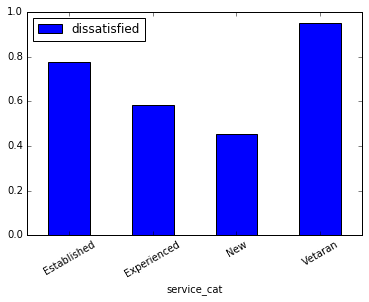

In [43]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.

